根据log.log文件绘制loss

In [1]:
import matplotlib.pyplot as plt
import re

In [2]:
def get_loss(log_path: str) -> list:
    train_loss, dev_loss, steps = [], [], set()
    with open(log_path, "r") as f:
        data = f.read().split("\n")
        for s in data:
            if s.startswith("rain losst"):
                numbers = re.findall(r'step (\d+): ([+-]?\d+\.\d+)', s)
                train_loss.append(float(numbers[0][1]))
                steps.add(int(numbers[0][0]))
            if s.startswith("dev loss"):
                numbers = re.findall(r'step (\d+): ([+-]?\d+\.\d+)', s)
                dev_loss.append(float(numbers[0][1]))
                steps.add(int(numbers[0][0]))

    return list(sorted(steps)), train_loss, dev_loss

In [3]:
def get_loss_acc(log_path: str, mode: str) -> list:
    train, dev, steps = [], [], set()
    if mode == "loss":
        train_symbol = "train loss"
        dev_symbol = "dev loss"
    elif mode == "acc":
        train_symbol = "train at"
        dev_symbol = "dev at"
    else:
        assert(mode)
    with open(log_path, "r") as f:
        data = f.read().split("\n")
        for s in data:
            if s.startswith(train_symbol):
                numbers = re.findall(r'step (\d+): ([+-]?\d+\.\d+)', s)
                train.append(float(numbers[0][1]))
                steps.add(int(numbers[0][0]))
            if s.startswith(dev_symbol):
                numbers = re.findall(r'step (\d+): ([+-]?\d+\.\d+)', s)
                dev.append(float(numbers[0][1]))
                steps.add(int(numbers[0][0]))


    return list(sorted(steps)), train, dev

In [96]:
steps, train_loss, dev_loss = get_loss_acc(log_path="log.log", mode="loss")
steps, train_acc, dev_acc = get_loss_acc(log_path="log.log", mode="acc")

In [97]:
len(steps), len(train_loss), len(dev_loss)

(20, 0, 0)

In [92]:
def plot(steps,train_accs, train_losses, dev_acc, dev_losses):
    # 绘制 acc 曲线
    plt.figure()
    plt.plot(steps,train_accs, label='Train')
    plt.plot(steps,dev_acc, label='dev')
    plt.xlabel('steps')
    plt.ylabel('Accuracy')
    plt.legend()

    # 绘制 loss 曲线
    plt.figure()
    plt.plot(steps,train_losses, label='Train')
    plt.plot(steps,dev_losses, label='dev')
    plt.xlabel('steps')
    plt.ylabel('Loss')
    plt.legend()

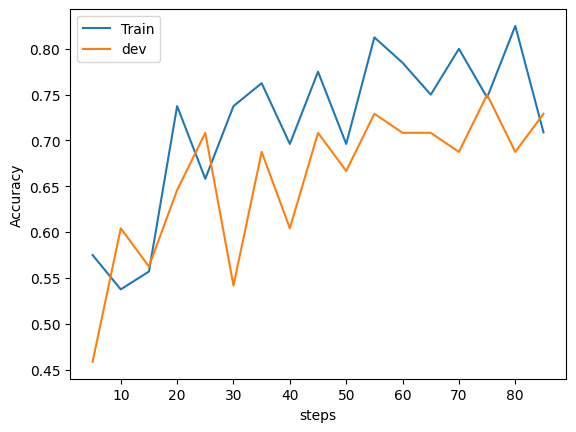

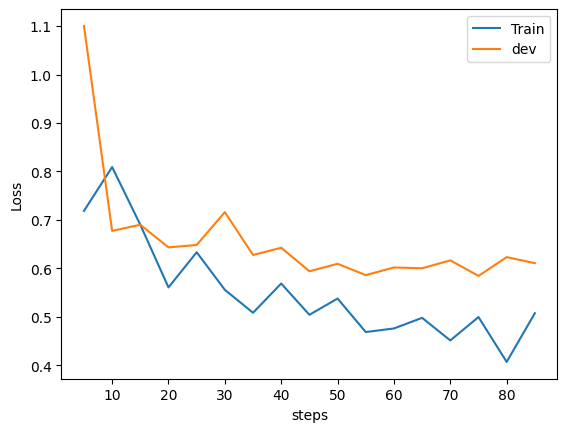

In [93]:
plot(steps, train_acc, train_loss, dev_acc, dev_loss)

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '2'

In [2]:
import torch

In [3]:
torch.cuda.get_device_name() == 'NVIDIA GeForce RTX 2080 Ti', torch.cuda.device_count()

(True, 1)

In [4]:
!nvidia-smi

Sat Jan  7 21:08:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.85.02    Driver Version: 510.85.02    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:19:00.0 Off |                  N/A |
| 50%   54C    P2   236W / 350W |  23645MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:1B:00.0 Off |                  N/A |
| 60%   

In [5]:
from s3prl.upstream.hubert.convert import load_and_convert_fairseq_ckpt
from s3prl.upstream.hubert.hubconf import hubert_custom

In [9]:
hubert_custom(ckpt = "https://huggingface.co/facebook/wav2vec2-xls-r-1b/blob/main/pytorch_model.bin", fairseq=True)

/home/wmh/.cache/s3prl/download/3d716703e3d59038f5c77fc8a60a95ff784c88900fc60d1c65be962c95c003f9.pytorch_model.bin


UnpicklingError: invalid load key, '<'.

In [7]:
load_and_convert_fairseq_ckpt(fairseq_source="/home/wmh/.cache/s3prl/download/3d716703e3d59038f5c77fc8a60a95ff784c88900fc60d1c65be962c95c003f9.pytorch_model.bin", output_path="A.pt")

/home/wmh/.cache/s3prl/download/3d716703e3d59038f5c77fc8a60a95ff784c88900fc60d1c65be962c95c003f9.pytorch_model.bin


UnpicklingError: invalid load key, '<'.

In [7]:
a = torch.load("/home/wmh/.cache/s3prl/download/a3cbb03599cd250b9eef9e495cba89692e3e317f7b2d0db7471ab0a58173eb89.pytorch_model.bin")

In [7]:
b = torch.load("/home/wmh/.cache/s3prl/download/544f5b47ce48ad4c05bc671e6e1ee1a077f5804393136a526c40d78719a314ee.hubert_large_ll60k.pt")

In [6]:
c = torch.load("/home/wmh/.cache/s3prl/download/3d716703e3d59038f5c77fc8a60a95ff784c88900fc60d1c65be962c95c003f9.pytorch_model.bin")

UnpicklingError: invalid load key, '<'.

In [8]:
b.keys()

dict_keys(['task_cfg', 'model_cfg', 'model_weight', 'dictionaries_symbols'])

In [ ]:
!nvidia-smi

In [14]:
for i in a.keys():
    print(i)

hubert.masked_spec_embed
hubert.feature_extractor.conv_layers.0.conv.weight
hubert.feature_extractor.conv_layers.0.conv.bias
hubert.feature_extractor.conv_layers.0.layer_norm.weight
hubert.feature_extractor.conv_layers.0.layer_norm.bias
hubert.feature_extractor.conv_layers.1.conv.weight
hubert.feature_extractor.conv_layers.1.conv.bias
hubert.feature_extractor.conv_layers.1.layer_norm.weight
hubert.feature_extractor.conv_layers.1.layer_norm.bias
hubert.feature_extractor.conv_layers.2.conv.weight
hubert.feature_extractor.conv_layers.2.conv.bias
hubert.feature_extractor.conv_layers.2.layer_norm.weight
hubert.feature_extractor.conv_layers.2.layer_norm.bias
hubert.feature_extractor.conv_layers.3.conv.weight
hubert.feature_extractor.conv_layers.3.conv.bias
hubert.feature_extractor.conv_layers.3.layer_norm.weight
hubert.feature_extractor.conv_layers.3.layer_norm.bias
hubert.feature_extractor.conv_layers.4.conv.weight
hubert.feature_extractor.conv_layers.4.conv.bias
hubert.feature_extractor.co

In [26]:
sorted(b['model_cfg'])

['_name',
 'activation_dropout',
 'activation_fn',
 'attention_dropout',
 'conv_bias',
 'conv_feature_layers',
 'conv_pos',
 'conv_pos_groups',
 'dropout',
 'dropout_features',
 'dropout_input',
 'encoder_attention_heads',
 'encoder_embed_dim',
 'encoder_ffn_embed_dim',
 'encoder_layerdrop',
 'encoder_layers',
 'extractor_mode',
 'feature_grad_mult',
 'final_dim',
 'label_rate',
 'latent_temp',
 'layer_norm_first',
 'logit_temp',
 'mask_channel_length',
 'mask_channel_min_space',
 'mask_channel_other',
 'mask_channel_prob',
 'mask_channel_selection',
 'mask_length',
 'mask_min_space',
 'mask_other',
 'mask_prob',
 'mask_selection',
 'no_mask_channel_overlap',
 'no_mask_overlap',
 'skip_masked',
 'skip_nomask',
 'target_glu',
 'untie_final_proj']

In [23]:
len(a.keys())

424

In [19]:
for k,v in a.items():
    print(k,v)

hubert.masked_spec_embed tensor([ 1.5205,  0.4970,  0.2805,  ...,  0.0879,  0.6937, -0.0418],
       device='cuda:0')
hubert.feature_extractor.conv_layers.0.conv.weight tensor([[[ 0.0032,  0.0016,  0.0021,  ...,  0.0058,  0.0037, -0.0006]],

        [[ 0.0028,  0.0011,  0.0023,  ...,  0.0053,  0.0036, -0.0012]],

        [[ 0.0022,  0.0007,  0.0019,  ...,  0.0058,  0.0040, -0.0007]],

        ...,

        [[ 0.0023,  0.0012,  0.0028,  ...,  0.0057,  0.0038, -0.0003]],

        [[ 0.0018,  0.0013,  0.0022,  ...,  0.0061,  0.0033, -0.0003]],

        [[ 0.0022,  0.0015,  0.0020,  ...,  0.0061,  0.0027, -0.0010]]],
       device='cuda:0')
hubert.feature_extractor.conv_layers.0.conv.bias tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [22]:
len(b["model_weight"].keys())

418